# NB2. Centrality Measures

## Isaac Chávez
## Gonzalo Manrique
## Ulises Mis
## Adrian Carmona

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="fig1.png" width="180"> </img>

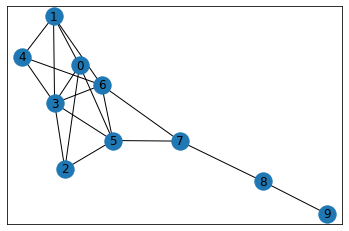

In [19]:
G_kite = nx.krackhardt_kite_graph()
nx.draw_networkx(G_kite)
plt.show()

II. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [20]:
degree_centrality = nx.degree_centrality(G_kite)

dict(sorted(degree_centrality.items(), reverse=True, key=lambda item: item[1]))

{3: 0.6666666666666666,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 4: 0.3333333333333333,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

The most important node based on degree centrality is the node 3 followed by the 5 and 6 with the same value

In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:
<img src="fig3.png" width="180"> </img>

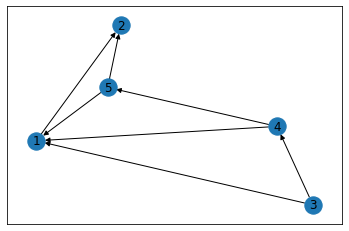

In [10]:
G = nx.DiGraph() 
#G.add_nodes_from([2, 3])
G.add_edges_from([(1, 2), (3, 1), (3, 4), (4, 1), (4, 5), (5, 1), (5,2)])
nx.draw_networkx(G)
plt.show()

In [12]:
closeness_node1 = nx.closeness_centrality(G, u=1)
closeness_node1

0.75

IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [22]:
closeness_centrality = nx.closeness_centrality(G_kite)

dict(sorted(closeness_centrality.items(), reverse=True, key=lambda item: item[1]))

{5: 0.6428571428571429,
 6: 0.6428571428571429,
 3: 0.6,
 7: 0.6,
 0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 4: 0.5,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

The most important nodes based in closeness centrality in the kite graph are 5, 6 followed by 3 and 7

### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:
<img src="fig2.png" width="180"> </img>

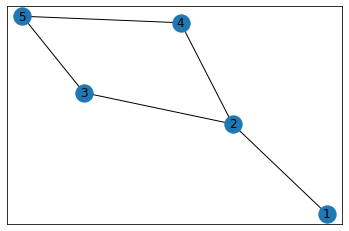

In [24]:
G2 = nx.Graph()
G2.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 5), (4, 5)])
nx.draw_networkx(G2)
plt.show()

In [26]:
betweenness_centrality = nx.betweenness_centrality(G2)
dict(sorted(betweenness_centrality.items(), reverse=True, key=lambda item: item[1]))

{2: 0.5833333333333333,
 3: 0.16666666666666666,
 4: 0.16666666666666666,
 5: 0.08333333333333333,
 1: 0.0}

The node with the highest betweenness centrality is 2

Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k). 
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [27]:
betweenness_centrality = nx.betweenness_centrality(G_kite)
dict(sorted(betweenness_centrality.items(), reverse=True, key=lambda item: item[1]))

{7: 0.38888888888888884,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 8: 0.2222222222222222,
 3: 0.10185185185185183,
 0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 4: 0.0,
 9: 0.0}

The most important nodes in the Kite Graph based on the Betweenness Cnetrality is node 7 followed by 5, 6  and 8

VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

| | Degree Centrality | Closeness Centrality | Betweenness Centrality|
| ------ | ----------- |---------| ----------| 
| 1st | 3 | 5, 6 | 7 |
| 2nd | 5,6 | 3, 7 | 5, 6 |
| 3rd | 0, 1 | 0, 1 | 8 |


## B. Eigenvector and Katz Centrality [30 pts]
In this section, you will obtain the **Eigenvector and Katz Centrality** for small networks. Additionally, you will compare this results with the theoretical description. 

The section is based on the chapter Zafarani, Reza et. al. (2014). *Network Measures from Social Media Mining.* Cambridge University Press.

### Eigenvector Centrality
VIII. Consider the following network:
<img src="fig4.png" width="180"> </img>
Represent it using NetworkX and its adjacency matrix using Numpy (Be careful about the order in the matrix).

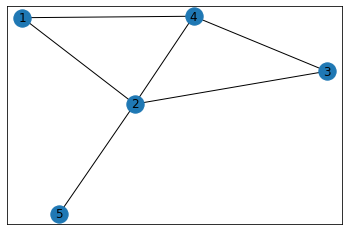

In [30]:
G3 = nx.Graph()
G3.add_edges_from([(1, 2), (1, 4), (2, 4), (2, 3), (3, 4), (2, 5)])
nx.draw_networkx(G3)
plt.show()

In [38]:
adjacency_matrix = np.array([ [0, 1, 0, 1, 0],
                              [1, 0, 1, 1, 1],
                              [0, 1, 0, 1, 0],
                              [1, 1, 1, 0, 0],
                              [0, 1, 0, 0, 0] ])

IX. Obtain the Eigenvector Centrality using NetworkX.

In [39]:
eigenvector_centrality = nx.eigenvector_centrality(G3)
dict(sorted(eigenvector_centrality.items(), reverse=True, key=lambda item: item[1]))

{2: 0.5825392535755105,
 4: 0.5236826290621273,
 1: 0.41191709737006765,
 3: 0.41191709737006765,
 5: 0.21691733875073665}

X. Obtain the Eigenvector Centrality using the Matrix Definition.

In [50]:
eigenvector_matrix = np.linalg.eig(adjacency_matrix)

for idx, vector in enumerate(eigenvector_matrix[1]):
    print("node: " +str(idx +1)  + " eigenvector centrality: "+ str(vector[0]))

node: 1 eigenvector centrality: 0.4119172769404973
node: 2 eigenvector centrality: 0.5825389996250447
node: 3 eigenvector centrality: 0.4119172769404973
node: 4 eigenvector centrality: 0.5236829442247816
node: 5 eigenvector centrality: 0.21691657788137772


### Katz Centrality

XI. Obtain the Katz Centrality using NetworkX considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [52]:
katz_centrality = nx.katz_centrality(G3, alpha=0.25, beta=0.2)
dict(sorted(katz_centrality.items(), reverse=True, key=lambda item: item[1]))

{2: 0.5600080132056173,
 4: 0.5014997075105204,
 1: 0.41791649380799795,
 3: 0.41791649380799795,
 5: 0.29254175243684233}

XII. Obtain the Katz Centrality using the Matrix Definition considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [75]:
alpha=0.25
beta=0.2

eigenvector_matrix = np.linalg.eig(adjacency_matrix)

A = adjacency_matrix.T
n = A.shape[0]
b = np.ones((n, 1)) * float(beta)

centrality = np.linalg.solve(np.eye(n, n) - (alpha * A), b)
norm = np.sign(sum(centrality)) * np.linalg.norm(centrality)
centrality =  centrality / norm
print(centrality)

[[0.41791648]
 [0.56000808]
 [0.41791648]
 [0.50149978]
 [0.29254154]]


### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [87]:
G_email = nx.read_edgelist('email-univ.edges')
print(nx.info(G_email))
print("Density d: ", nx.density(G_email))
print("Clusterig Coefficient:", nx.average_clustering(G_email) )
degree_sequence = sorted([d for n, d in G_email.degree()], reverse=True)
dmax = max(degree_sequence)
dmin = min(degree_sequence)
print("Max Degree:", dmax)
print("Min Degree:", dmin)
transivity = nx.transitivity(G_email)
print("Transivity: ", transivity)

Name: 
Type: Graph
Number of nodes: 1133
Number of edges: 5451
Average degree:   9.6222
Density d:  0.00850021363589582
Clusterig Coefficient: 0.2201760865041161
Max Degree: 71
Min Degree: 1
Transivity:  0.16625006482393817


II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

-- It is possible to go from one student/profesor unless there is no channel created previously, but in the same channel is not possible to go to another student/professor

III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid. 

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students? 

Answers:

a) For this case the chosen nodes are the ones with the highest degree centrality, since these nodes are highly connected and can distribute the message to more individuals 

b) For this case the chosen node is the one with the highest closeness centrality, this decision is beacuse the closeness centrality are the individuals who are the best placed to influence the entire network more quickly, this means that would require a lower average number of emails.

c) To disrupt the distribution is necesary to use the nodes with the highest betweeness centrality, since this are the 'bridges' of the network, and are the individuals who influence the flow around the network.

**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.